# **Stoke Dataset SVM x Decision Trees x Random Forest Performance Comparison**
by Dominador G. Dano Jr.

## **Dataset Description**

In [44]:
import pandas as pd

data = pd.read_csv('stroke.csv')
data_raw = data
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [45]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## **Duplicate Column Detection**

In [46]:
from library.preprocess import find_duplicate_columns

find_duplicate_columns(data)

'No duplicate columns found'

## **NaN/Missing Values Detection**
201 missing values was detected on "bmi" column

In [47]:
from library.preprocess import count_missing_values

count_missing_values(data)

,Column,Missing Values
0,id,0
1,gender,0
2,age,0
3,hypertension,0
4,heart_disease,0
5,ever_married,0
6,work_type,0
7,Residence_type,0
8,avg_glucose_level,0
9,bmi,201


## **Filling Missing Values with Linear Regression**

In [48]:
from library.impute import fill_missing_values

data = fill_missing_values(data)
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,30.406430,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,2,1,83.75,33.592506,2,0
5106,44873,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,19723,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,37544,1,51.0,0,0,1,2,0,166.29,25.600000,1,0


## **Double Checking for missing values**
It is shown that the data set contains no missing values after applying imputation with Linear Regression

In [49]:
count_missing_values(data)

,Column,Missing Values
0,id,0
1,gender,0
2,age,0
3,hypertension,0
4,heart_disease,0
5,ever_married,0
6,work_type,0
7,Residence_type,0
8,avg_glucose_level,0
9,bmi,0


## **Outlier Detection for Age column**
No outliers detected for age column


Outliers detected using IQR method in column 'age':
Series([], Name: age, dtype: float64)


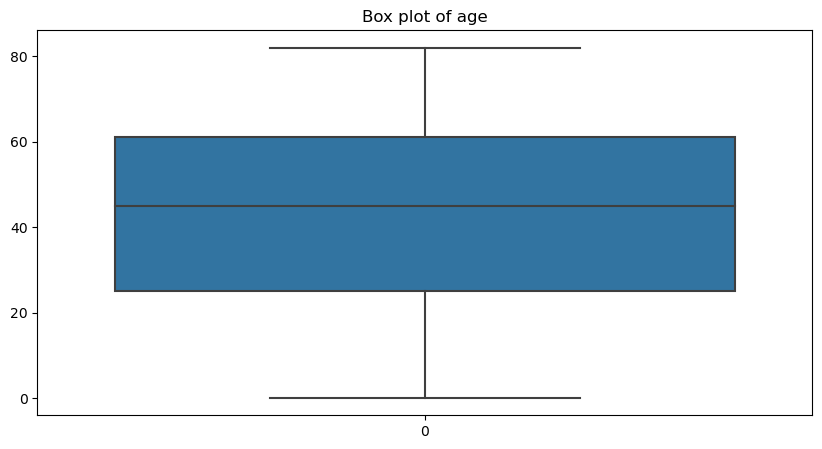

Series([], Name: age, dtype: float64)

In [50]:
from library.preprocess import detect_outliers
detect_outliers(data, 'age')

## **Outlier Detection for BMI column**
IQR outlier detection for continuous columns


Outliers detected using IQR method in column 'bmi':
2128    97.6
4209    92.0
Name: bmi, dtype: float64


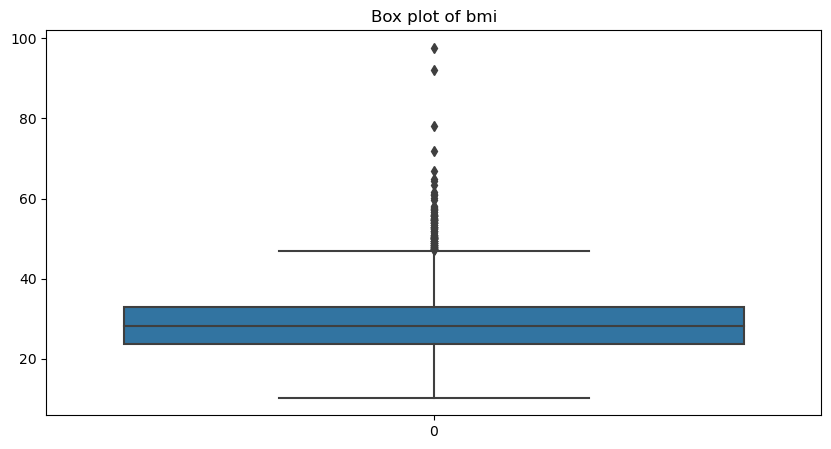

2128    97.6
4209    92.0
Name: bmi, dtype: float64

In [51]:
from library.preprocess import detect_outliers
detect_outliers(data, 'bmi')